# Genetic Linear Regression with Numpy
A solution... via evolution!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sample_num = 10
beta_true = [3, 5]
x_obs = np.random.normal(5, 3, sample_num)
y_obs = beta_true[0] + beta_true[1]*x_obs + np.random.normal(x_obs, 2, sample_num)

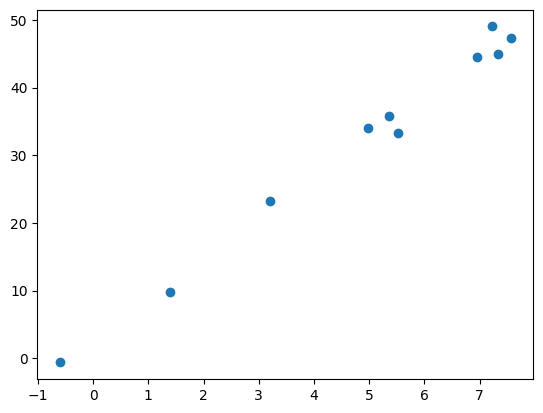

In [3]:
plt.scatter(x_obs, y_obs);

In [4]:
def rmse_fitness(beta):
    y_hat = beta[0] + x_obs*beta[1]
    rmse = np.sqrt(np.mean((y_hat - y_obs)**2))
    return rmse

In [5]:
def rank(betas, rmse_fitness):
    scored = np.column_stack((betas, np.apply_along_axis(rmse_fitness, axis=1, arr=betas))) 
    ranked = scored[scored[:, 2].argsort()]
    return ranked

In [17]:
def select(ranked, frac):
    top_num = int(frac*ranked.shape[0])
    survivors = ranked[:top_num]
    return survivors

In [18]:
def mate(survivors, gen_size):    
    rank_weighting = np.linspace(1, 0, survivors.shape[0])
    rank_weighting /= rank_weighting.sum()

    sampled_b0 = np.random.choice(survivors[:,0], size=gen_size, replace=True, p=rank_weighting)
    sampled_b1 = np.random.choice(survivors[:,1], size=gen_size, replace=True, p=rank_weighting)
    sampled_betas = np.column_stack((sampled_b0, sampled_b1))

    # mutation
    mutation = np.random.normal(0, 1, (gen_size, 2))
    
    # next generation
    new_betas = sampled_betas + mutation

    return new_betas

In [19]:
beta = np.random.normal(-10,10, 2)
beta

array([-22.04773766,  -5.66036649])

In [20]:
rmse_fitness([  18.54413807,   3.36654949])

np.float64(7.674538929072409)

In [21]:
gen_size = 10
betas = np.random.normal(0, 10, (gen_size, 2))
betas

array([[  4.04644903,  28.43581195],
       [-18.35486918,  -7.79153169],
       [ -1.65683345,  -1.33773405],
       [-12.96676106, -17.30212242],
       [ -0.40594771,   5.94139415],
       [ -9.06547774, -17.01969421],
       [ 12.46489636,  27.47152655],
       [ -5.65221945,   5.80705849],
       [ -2.98753429,   4.69744079],
       [ 27.20034385,  12.88164201]])

In [22]:
ranked = rank(betas, rmse_fitness)
ranked

array([[ -0.40594771,   5.94139415,   3.84278037],
       [ -5.65221945,   5.80705849,   9.54116547],
       [ -2.98753429,   4.69744079,  12.73601249],
       [ -1.65683345,  -1.33773405,  44.73926706],
       [ 27.20034385,  12.88164201,  60.8187778 ],
       [-18.35486918,  -7.79153169,  95.73154868],
       [  4.04644903,  28.43581195, 125.60333681],
       [ 12.46489636,  27.47152655, 127.75586225],
       [ -9.06547774, -17.01969421, 138.34177834],
       [-12.96676106, -17.30212242, 143.42783712]])

In [23]:
survivors = select(ranked, 0.2)
survivors

array([[-0.40594771,  5.94139415,  3.84278037],
       [-5.65221945,  5.80705849,  9.54116547]])

In [24]:
sampling_weights = np.linspace(1, 0, survivors.shape[0])
sampling_weights /= sampling_weights.sum()
sampling_weights

array([1., 0.])

In [25]:
np.random.normal(survivors[0,0], 3, 5)

array([-1.22281496, -1.12143015, -1.65726228, -3.55078218, -1.09878324])

In [29]:
gen_size = 100
betas = np.random.uniform(-1, 1, (gen_size, 2))
best_fit = []
verbose = True
for gen in range(5):
    if verbose:
        print(f"Generation: {gen}")
    
    # ranking
    ranked = rank(betas, rmse_fitness)
    best_fit.append(ranked[0][2])
    
    # selection
    survivors = select(ranked, 0.2)
    
    if verbose:
        print(f"survivors:\n {survivors}")
    
    # crossover and mutation -> next generation
    betas = mate(survivors, gen_size)

    if verbose:
        print(f"next betas: \n {betas[:10]}")
        print('\n')

# print(betas[:10])


Generation: 0
survivors:
 [[ 0.25125653  0.99916818 30.07742296]
 [ 0.61086061  0.88430752 30.39105703]
 [-0.67636855  0.97670177 31.03749747]
 [-0.30756774  0.90335205 31.11068683]
 [ 0.71522543  0.71082699 31.25859026]
 [ 0.33662215  0.76939494 31.27327883]
 [-0.63185733  0.88317547 31.5149451 ]
 [-0.83519294  0.88546064 31.68605117]
 [ 0.63588848  0.60558442 31.91256716]
 [ 0.1332567   0.68498134 31.92330568]
 [-0.88398087  0.84708104 31.94258565]
 [ 0.29718015  0.64039847 32.02312681]
 [-0.2859113   0.67707975 32.34398196]
 [-0.53759984  0.71504267 32.36061781]
 [ 0.50891444  0.52989473 32.44551129]
 [ 0.38305105  0.54756827 32.4603458 ]
 [-0.57702645  0.69640311 32.49937852]
 [-0.10082946  0.59322991 32.6417815 ]
 [ 0.5106163   0.48337305 32.70170946]
 [ 0.91359773  0.41052705 32.74507506]]
next betas: 
 [[ 1.90763409  0.22840383]
 [-0.41036889  0.98211594]
 [ 1.34603168  1.69257338]
 [-0.68007047  1.4587364 ]
 [ 0.48943111  0.90165344]
 [ 0.02467175  1.53759483]
 [ 0.09040338  2.

In [30]:
best_fit

[np.float64(30.07742295708848),
 np.float64(17.140973618699075),
 np.float64(4.416729116218631),
 np.float64(1.606489501687232),
 np.float64(1.6288016267957697)]